<a href="https://colab.research.google.com/github/vinaybadewale/AIML/blob/main/Ineuron_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 66.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [63]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [64]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [66]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
# divide dataset into dependent and independent features
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

In [68]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [69]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [70]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [71]:
## Concatenate these variables with dataframe
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [72]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [73]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [74]:
# prompt: Using dataframe X: convert true false into 1 and 0

X['Germany'] = X['Germany'].astype(int)
X['Spain'] = X['Spain'].astype(int)
X['Male'] = X['Male'].astype(int)


KeyError: 'Germany'

In [75]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [76]:
# splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
# lets create ANN
from tensorflow.keras.models import Sequential # forward and backward propogation
from tensorflow.keras.layers import Dense # for creating HL, OL,
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout # sometimes leads to overfitting - for train-accuracy is high, for test ots low || Similar to regularisation

In [79]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
classifier = Sequential()
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [81]:
## adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [82]:
## Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [83]:
## adding the output layer
classifier.add(Dense(units=1, activation='sigmoid')) # sigmoid as it is binary classificawtion

In [84]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # adam provides its own learning rate

In [85]:
# if we want to add our learning rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [86]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy']) # adam provides its own learning rate

In [87]:
## early stopping
import tensorflow as tf
import keras
import keras.utils
from keras import utils as np_utils
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [88]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.5337 - accuracy: 0.7710 - val_loss: 0.4632 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4568 - accuracy: 0.7987 - val_loss: 0.4474 - val_accuracy: 0.7986
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4466 - accuracy: 0.8043 - val_loss: 0.4384 - val_accuracy: 0.8001
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4355 - accuracy: 0.8117 - val_loss: 0.4304 - val_accuracy: 0.8080
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4321 - accuracy: 0.8166 - val_loss: 0.4237 - val_accuracy: 0.8103
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4246 - accuracy: 0.8197 - val_loss: 0.4175 - val_accuracy: 0.8160
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4160 - accuracy: 0.8244 - val_loss: 0.4078 - val_accuracy:

In [89]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

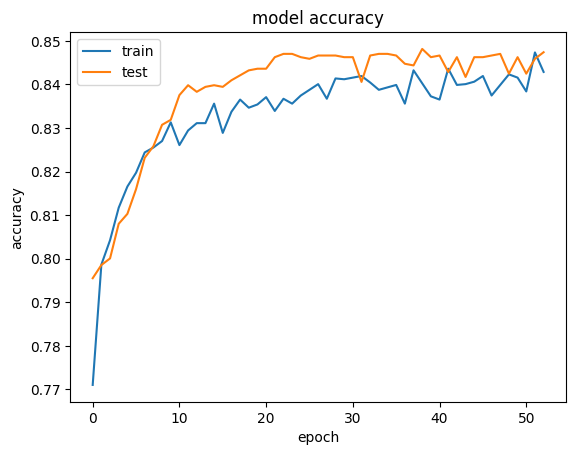

In [90]:
# summarise the plot
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
# making the predictions and evaluating the mode


In [57]:
y_pred  = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1549,   46],
       [ 259,  146]])

In [59]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [60]:
score

0.8475

In [62]:
classifier.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 11) dtype=float32, numpy=
 array([[ 1.04657352e+00, -1.29102552e+00,  1.48717716e-01,
          2.11973357e+00, -1.45522511e+00, -7.92510152e-01,
         -6.37708426e-01,  3.02729416e+00,  3.66258889e-01,
          6.66063130e-01, -1.95986003e-01],
        [-1.06912625e+00, -8.94779742e-01,  9.77569640e-01,
          2.72249770e+00, -3.04673862e+00,  3.27277517e+00,
          4.47723150e+00,  1.20642975e-01, -3.74488044e+00,
         -5.41382551e-01, -3.26603711e-01],
        [-1.45224392e+00,  6.04324698e-01,  8.82610023e-01,
          8.12604785e-01,  7.41090894e-01, -3.21432561e-01,
         -8.21739614e-01,  1.14005065e+00, -1.13880253e+00,
          1.76806226e-01, -1.43872410e-01],
        [ 1.61812985e+00, -1.12998998e+00,  7.68086612e-01,
         -1.41984427e+00,  1.26655602e+00, -5.87186933e-01,
          1.09169745e+00,  1.53773010e-01,  4.11864370e-01,
         -4.05513144e+00,  8.24462831e-01],
        [ 1.06252789e+00,  2.36020780